# Price is Right..of the Car!

# Index

- [1 Introduction](#1)
- [2 K-Nearest Neighbors](#2)
- [3 Reading the Data](#3)
- [4 Impurity Removal](#4)
- [5 Co-related](#5)
- [6 Lying Outside...Outliers](#6)
- [7 On their Own...](#7)
- [8 ..With the Pack..](#8)
- [9 Cross Validate This!](#9)
- [10 Conclusion](#10)
- [11 Learnings](#11)

# 1

## Introduction

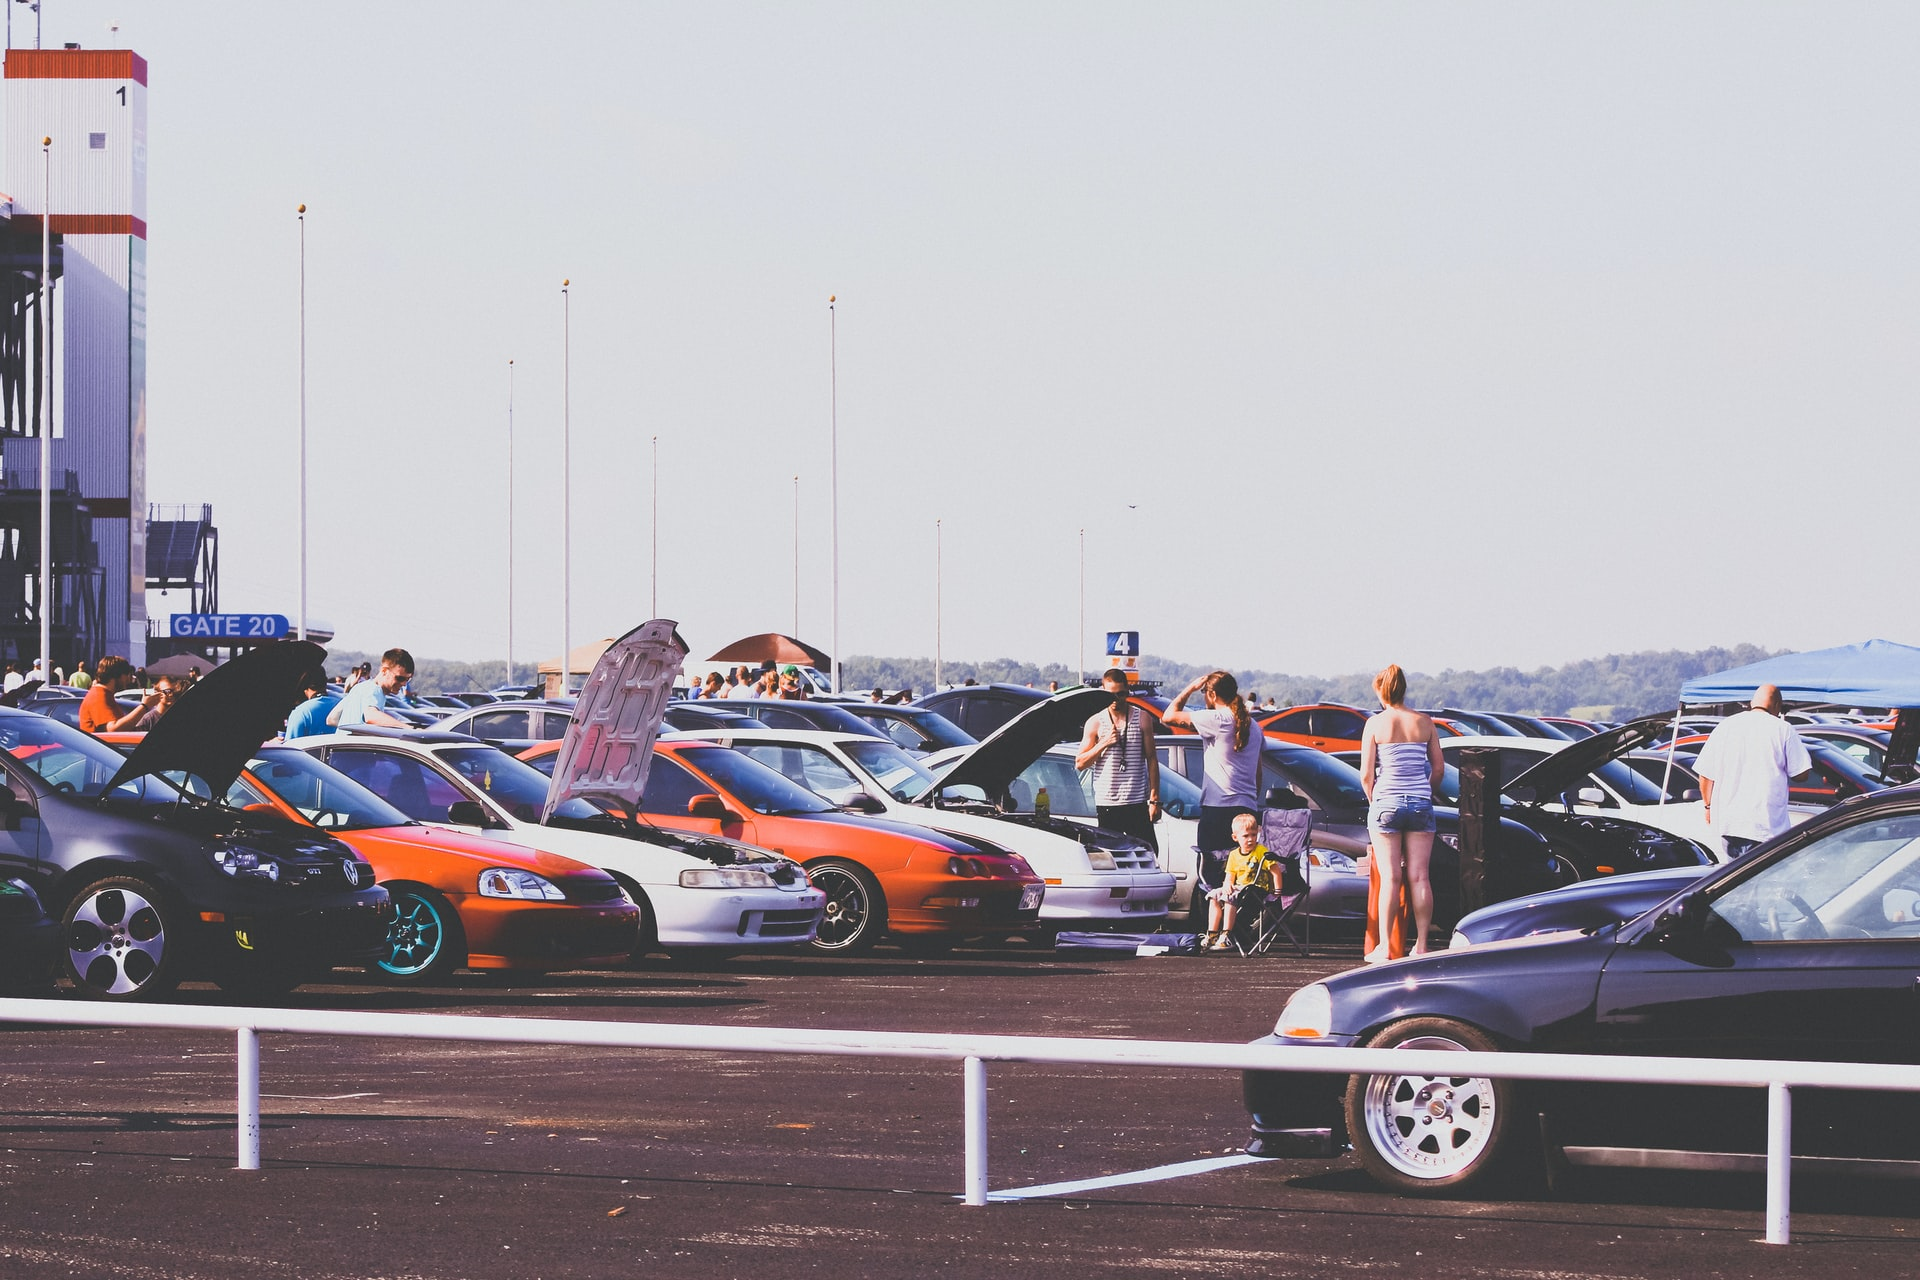
*Source*:[Unsplash-Parker Gibbs](https://unsplash.com/photos/pdUVFX8WglY)

Making the decision on what the price of a second hand car must be is difficult. The price can depend on a number of parameters including the make, actuary evaluation etc. A system to predict the price of such cars would be very beneficial to users.

In this project we shall attempt to predict the price of a car using a dataset of second hand cars. The prediction will be attempted using K-Neighbors algorithm.

Our goal for this project shall be:
- To attempt to create a model using the K-Neighbors algorithim that can predict the price of a car.
- Calculate the accuracy of the predictions based on the md

[Index](#Index)

# 2

## K-Nearest Neighbors

K-Nearest Neighbors is an algorithm that predicts by comparing entities with similar features. An analogy that can be used to understand this better is that of a homeowner trying to evaluate the price of his/her home. The homeowner would ask around and research on the price of homes similar to his own. He/she would look at such features as the number of bathrooms, bedrooms, locality etc.

After finding homes with almost similar features as his/her own, the homeowner would find it easier to hash out an average value for his/her own home.

The K in the algorithm stands for the number of homes he/she uses to evaluate the average. K can be 5 or 7 i.e. the owner may consider 5 or 7 of the best houses that are similar to his/her own to calculate the average price.

Therefore, a quick summary of the K-Nearest Neighbors algorithm would be that it evaluates entities(like homes) by comparing features (like a home's locality, its area etc.) considered important by a user. 
It then picks those entities that are most similar to the entity being compared against (the user's own home) and predicts the value of a feature (the price of a home) by calculating the average of the same feature (the price of other homes) for the comparable entities.

[Index](#Index)

# 3

## Reading the Data

The dataset that will be used to create the model for this project has been provided by Jeffrey C. Schlimmer on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile).

The dataset contains listings of cars that include their various charachteristics like length, width, engine size etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.neighbors as skneighbors
import sklearn.metrics as skmetrics
import sklearn.model_selection as skmodelselection
from prettytable import PrettyTable

In [2]:
def bold_print(a_string,a_value=None):
    """
    Boldens the output
    
    Args:
        a_string (string): String to be bolded
    """
    print("\033[1m"+a_string+"\033[0m"+'\n')

In [3]:
col_names = ["symboling","normalized_losses","make","fuel_type","aspiration","num_doors","body_style",
             "drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type",
             "num_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
             "peak_rpm","city_mpg","highway_mpg","price"]
cars = pd.read_csv("imports-85.data", names=col_names)
cars.head(10)

symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3                 ?  alfa-romero       gas        std       two   
1          3                 ?  alfa-romero       gas        std       two   
2          1                 ?  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   
5          2                 ?         audi       gas        std       two   
6          1               158         audi       gas        std      four   
7          1                 ?         audi       gas        std      four   
8          1               158         audi       gas      turbo      four   
9          0                 ?         audi       gas      turbo       two   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   
5        sedan          fwd           front        99.8  ...          136   
6        sedan          fwd           front       105.8  ...          136   
7        wagon          fwd           front       105.8  ...          136   
8        sedan          fwd           front       105.8  ...          131   
9    hatchback          4wd           front        99.5  ...          131   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   
5         mpfi  3.19    3.40               8.5        110      5500       19   
6         mpfi  3.19    3.40               8.5        110      5500       19   
7         mpfi  3.19    3.40               8.5        110      5500       19   
8         mpfi  3.13    3.40               8.3        140      5500       17   
9         mpfi  3.13    3.40               7.0        160      5500       16   

  highway_mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  
5          25  15250  
6          25  17710  
7          25  18920  
8          20  23875  
9          22      ?  

[10 rows x 26 columns]

A quick glance at the dataset reveals that it contains both categorical and continuous variables. Since we are evaluating using K-Nearest Neighbors, we shall only be considering the continuous variables. Continuous variables have numeric data that allows the algorithm to compare features more easily. 

The following are the numeric columns that will be considered for further analysis:
- normalized-losses  
- wheel-base        
- length            
- width             
- height            
- curb-weight       
- bore              
- stroke            
- compression-ratio  
- horsepower        
- peak-rpm         
- city-mpg           
- highway-mpg        
- price             

In [4]:
#Define numerical columns
num_cols=['wheel_base', 'length',
          'width','height','curb_weight',
          'engine_size','bore','stroke', 
          'compression_ratio','horsepower','peak_rpm',
          'city_mpg','highway_mpg','price']

[Index](#Index)

# 4

## Impurity Removal
**Cleaning the data**

While analyzing the data it was found that many of the identified columns have the incorrect data type and *?* to indicate missing data.

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

Since the *normalized-losses* has missing data we shall be removing the column altogether as it is impossible to fill the missing values. The loss for different car brands are different, it is therefore not possible to fill the missing values with something valid.

The incorrect data type against the numeric columns need to be corrected as well.

In [6]:
#Clean the cars dataset
cars=cars.replace('?',np.nan)
cars.drop(columns=["normalized_losses"],inplace=True)
cars[["curb_weight",
      "bore","stroke","horsepower",
      "peak_rpm","price"]]=cars[["curb_weight",
                                 "bore","stroke","horsepower",
                                 "peak_rpm","price"]].astype("float")

We shall next evaluate for null values.

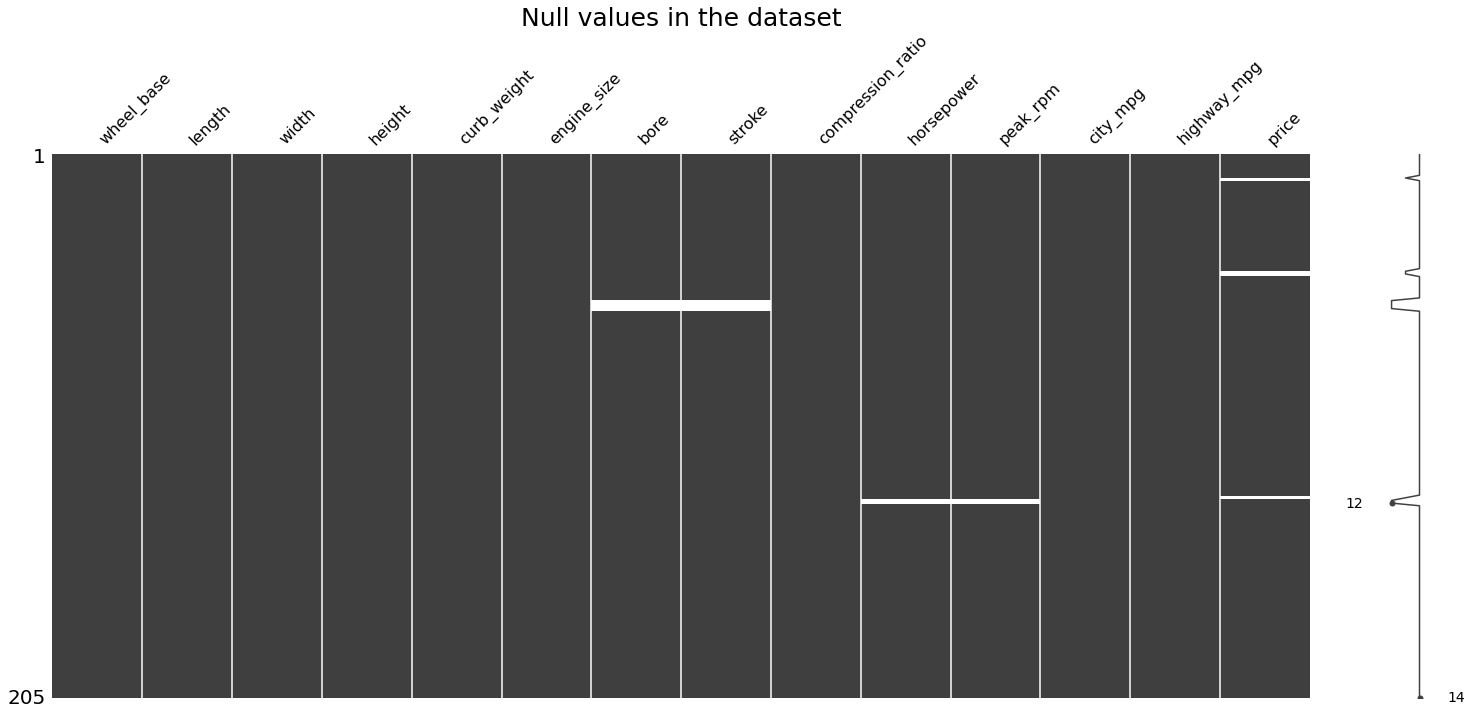

In [7]:
msno.matrix(cars[num_cols])
plt.title("Null values in the dataset", size=25)
plt.show()

We shall quickly evaluate the missing values.

In [8]:
cars[cars['price'].isnull()][['make','price']]

make  price
9       audi    NaN
44     isuzu    NaN
45     isuzu    NaN
129  porsche    NaN

In [9]:
cars[cars['bore'].isnull()][['make','bore','stroke']]

make  bore  stroke
55  mazda   NaN     NaN
56  mazda   NaN     NaN
57  mazda   NaN     NaN
58  mazda   NaN     NaN

In [10]:
cars[cars['horsepower'].isnull()][['make','horsepower','peak_rpm']]

make  horsepower  peak_rpm
130  renault         NaN       NaN
131  renault         NaN       NaN

Since the price column is the target feature, null values in the *price* column is unacceptable. Since there are only few missing values in the other columns, it should not significantly affect the model as only cars associated to two models are being removed.

In [11]:
cars.dropna(inplace=True)

Now that we have removed the null values. We shall have to find out the number of rows after removing null values.

In [12]:
bold_print("Number of rows after removing the null values:")
cars.shape[0]

Number of rows after removing the null values:



193

[Index](#Index)

# 5

## Co-related
**Identifying features that are most correlated to Price**

Before we proceed with further analysis, we need to identify the columns that are most related to price. We will be using only those columns to identify the best combination of features to predict the price.

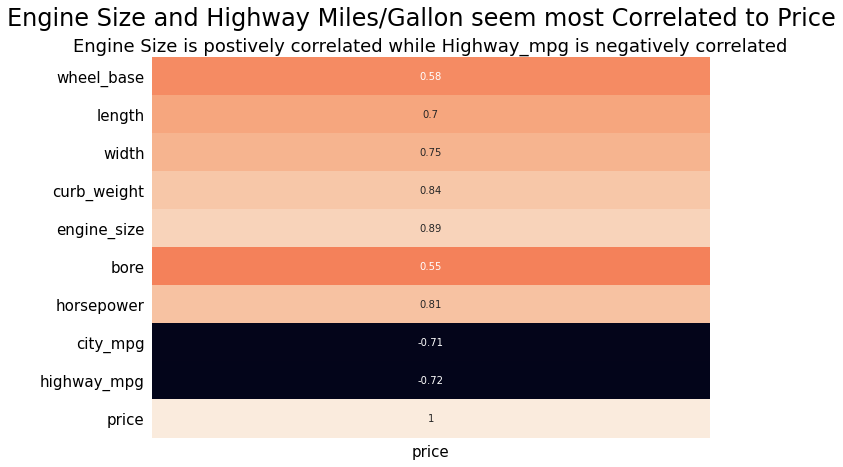

In [13]:
correlations=cars.corr()

#Filter features that are most correlated to price
most_corr_features = correlations[(correlations['price'].between(-1,-0.5)) | (correlations['price'].between(0.5,1))]['price']

correlation = cars[most_corr_features.index].corr()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.heatmap(correlation.loc[:,"price":"price"],annot=True,cbar=False)
ax.tick_params(axis='y',left=False,rotation=0,labelsize=15)
ax.tick_params(axis='x',bottom=False,rotation=0,labelsize=15)
ax.set_title("Engine Size is postively correlated while Highway_mpg is negatively correlated",size=18)
plt.suptitle("Engine Size and Highway Miles/Gallon seem most Correlated to Price",size=24)
plt.show()

The features we have identified above will be used in the model to predict prices.

[Index](#Index)

# 6

## Lying Outside...Outliers
**Identifying and removing outliers in the selected features**

Since we have identified a couple of features that are most correlated to price, we need to remove any outliers that may exist in the dataset. Being a small dataset outliers can significantly affect the outcome of the models we create.

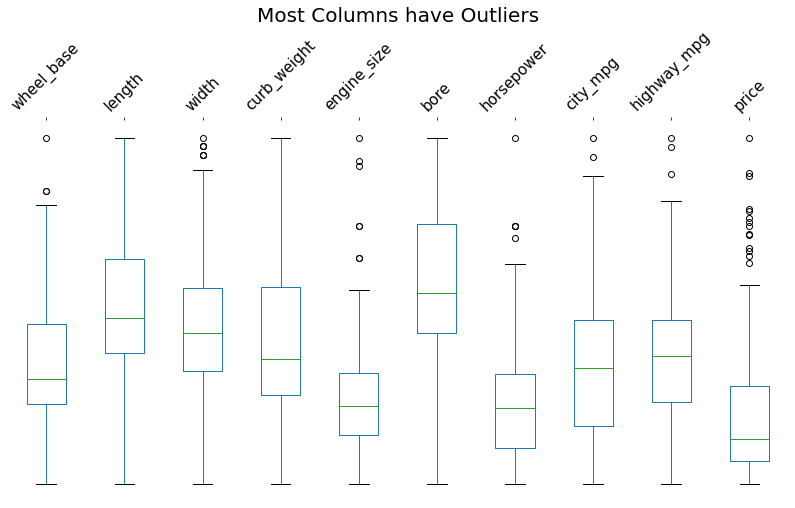

In [14]:
correlated_features=most_corr_features.index
normalized_cols=(cars[correlated_features]-cars[correlated_features].min())/(cars[correlated_features].max()-cars[correlated_features].min())

#Define the plot
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
for key,vals in ax.spines.items():
    if (key!="top") | (key!="left"):
        ax.spines[key].set_visible(False)
ax.xaxis.tick_top()
normalized_cols.boxplot()
ax.tick_params(axis="x",labelsize=15,labelrotation=45)
ax.tick_params(axis="y",left=False)
ax.set_yticklabels([])

plt.title("Most Columns have Outliers",size=20)
plt.grid(False)
plt.show()

Clearly almost every column besides *length* has outliers. We shall remove the outliers in the above identified columns. We shall start with removing the outliers in the *price* column since it is our target column.

In [15]:
def plot_boxplot(dataset,col_name,color,ref_cols=['make','price']):
    """
    Outlier analysis of a column associated to a dataset
    
    Args:
        dataset(dataframe): Dataset for which analysis will be done
        col_name(string): Name of the column to be analysed
        ref_cols(list): Additional columns related to the column being analysed (default is []'make','price'])
    """
    
    fig = plt.figure(figsize=(12,6))
    
    #Define boxplot
    ax1 = fig.add_subplot(121)
    for keys,vals in ax.spines.items():
        ax1.spines[keys].set_visible(False)
    ax1.xaxis.tick_top()
    dataset[[col_name]].boxplot()
    ax1.tick_params(axis="x",top=False,labelsize=18)
    ax1.tick_params(axis="y",labelsize=11)
    
    #Define histplot
    ax2=fig.add_subplot(122)
    for keys,vals in ax.spines.items():
        if keys!='bottom':
            ax2.spines[keys].set_visible(False)
    ax2.xaxis.tick_top()
    sns.histplot(data = dataset, x = col_name, color=color)
    ax2.tick_params(axis="x",labelsize=16)
    ax2.tick_params(axis="y",labelsize=11)
    ax2.set_xlabel(None)
    ax2.set_ylabel("Frequency")
    plt.suptitle("Outliers in {} column".format(col_name),size=20)
    plt.show()
    
    bold_print("5 Highest values of column:")
    print(dataset[ref_cols+[col_name]].sort_values(col_name,ascending=False).head(5))
    print("---")
    bold_print("Statistical data of column:")
    print(dataset[col_name].describe())

In [16]:
cars_copy=cars.copy()
removed_lines=0

#### Outliers in *price* column

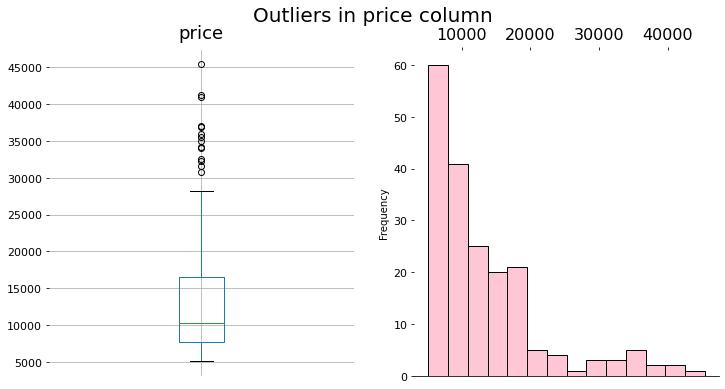

5 Highest values of column:

              make    price
74   mercedes-benz  45400.0
16             bmw  41315.0
73   mercedes-benz  40960.0
128        porsche  37028.0
17             bmw  36880.0
---
Statistical data of column:

count      193.000000
mean     13285.025907
std       8089.082886
min       5118.000000
25%       7738.000000
50%      10245.000000
75%      16515.000000
max      45400.000000
Name: price, dtype: float64


In [17]:
plot_boxplot(cars,'price','#FFB3C9',['make'])

Vehicles above \$30,000 are in the outlier. Most of these cars are luxury vehicles and their prices are significantly greater than the average car in the dataset. Since *price* is a target column, the inclusion of such huge values could affect the predictions of the model we intend to create. So all rows in the dataset having more than \$30,000 will not be considered when creating the model.

In [18]:
num_lines=len(cars[cars['price']>30000])
removed_lines+=num_lines
cars=cars[cars['price']<30000]
bold_print("Number of datapoints removed:")
print(num_lines)

Number of datapoints removed:

14


---

#### Outliers in *wheel_base*  column

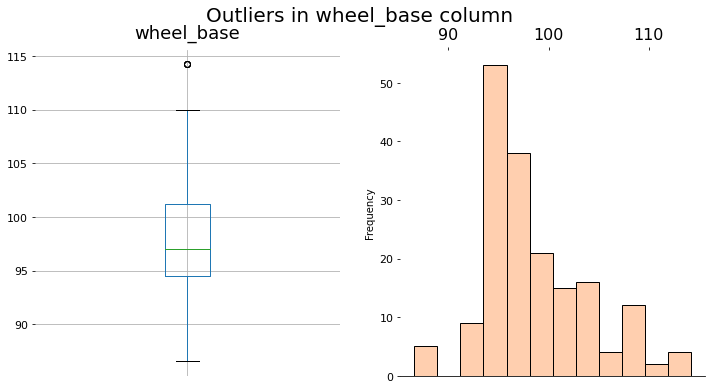

5 Highest values of column:

              make    price  wheel_base
109         peugot  12440.0       114.2
114         peugot  17075.0       114.2
113         peugot  16695.0       114.2
110         peugot  13860.0       114.2
67   mercedes-benz  25552.0       110.0
---
Statistical data of column:

count    179.000000
mean      98.425140
std        5.389772
min       86.600000
25%       94.500000
50%       97.000000
75%      101.200000
max      114.200000
Name: wheel_base, dtype: float64


In [19]:
plot_boxplot(cars,'wheel_base','#FFC094')

Since the correlation of price and wheel base is just 0.58 which is not a really strong correlation when compared to say *engine_size* and since there are only 4 cars of the same brand that are affected by this outlier, we shall leave this as is.

---

#### Outliers in *width*  column

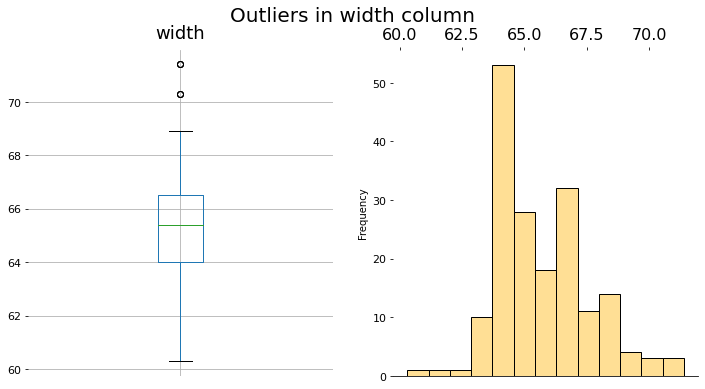

5 Highest values of column:

             make    price  width
6            audi  17710.0   71.4
8            audi  23875.0   71.4
7            audi  18920.0   71.4
68  mercedes-benz  28248.0   70.3
69  mercedes-benz  28176.0   70.3
---
Statistical data of column:

count    179.000000
mean      65.639106
std        1.872489
min       60.300000
25%       64.000000
50%       65.400000
75%       66.500000
max       71.400000
Name: width, dtype: float64


In [20]:
plot_boxplot(cars,'width','#FFD572')

Since the correlation between *width* and *price* is high, it is likely that these outliers can cause bias in the output of our model. We shall therefore remove these outliers.

In [21]:
num_lines=len(cars[cars['width']>69])
removed_lines+=num_lines
cars=cars[cars['width']<69]
bold_print("Number of datapoints removed:")
print(num_lines)

Number of datapoints removed:

6


---

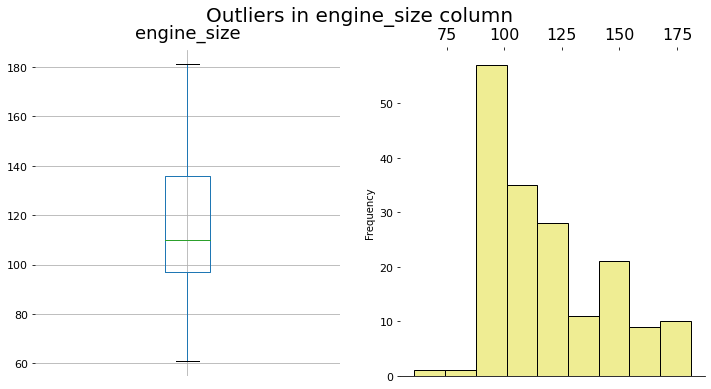

5 Highest values of column:

       make    price  engine_size
105  nissan  19699.0          181
101  nissan  13499.0          181
102  nissan  14399.0          181
103  nissan  13499.0          181
104  nissan  17199.0          181
---
Statistical data of column:

count    173.000000
mean     118.277457
std       25.509310
min       61.000000
25%       97.000000
50%      110.000000
75%      136.000000
max      181.000000
Name: engine_size, dtype: float64


In [22]:
plot_boxplot(cars,'engine_size','#EAE86F')

While removing the outliers from the earlier columns, we have removed the outliers in the *engine_size* column.

---

#### Outliers in *horsepower*  column

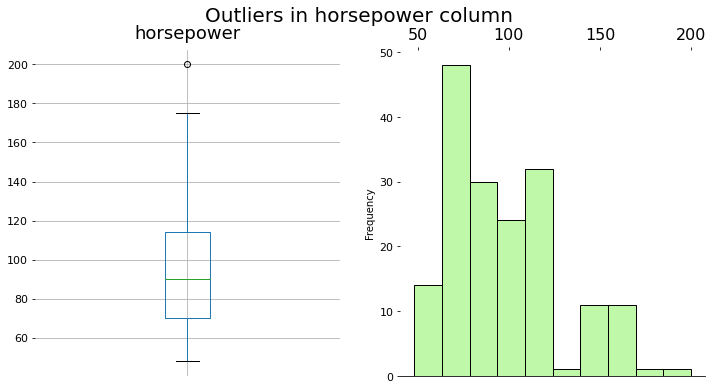

5 Highest values of column:

        make    price  horsepower
105   nissan  19699.0       200.0
75   mercury  16503.0       175.0
198    volvo  18420.0       162.0
199    volvo  18950.0       162.0
178   toyota  16558.0       161.0
---
Statistical data of column:

count    173.000000
mean      96.306358
std       30.523796
min       48.000000
25%       70.000000
50%       90.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64


In [23]:
plot_boxplot(cars,'horsepower','#AAF68D')

*horspower* is highly correlated to *price* so the outlier in the column will be removed.

In [24]:
num_lines=len(cars[cars['horsepower']>199])
removed_lines+=num_lines
cars=cars[cars['horsepower']<199]
bold_print("Number of datapoints removed:")
print(num_lines)

Number of datapoints removed:

1


---

#### Outliers in *city_mpg*  column

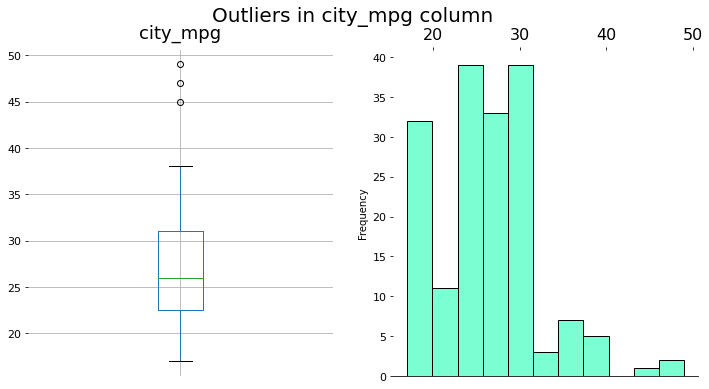

5 Highest values of column:

         make   price  city_mpg
30      honda  6479.0        49
18  chevrolet  5151.0        47
90     nissan  7099.0        45
19  chevrolet  6295.0        38
20  chevrolet  6575.0        38
---
Statistical data of column:

count    172.000000
mean      26.319767
std        5.981166
min       17.000000
25%       22.500000
50%       26.000000
75%       31.000000
max       49.000000
Name: city_mpg, dtype: float64


In [25]:
plot_boxplot(cars,'city_mpg','#4FFEC2')

*city_mpg* is negatively and highly correlated to *price*. Therefore the outliers in it will be removed.

In [26]:
num_lines=len(cars[cars['city_mpg']>45])
removed_lines+=num_lines
cars=cars[cars['city_mpg']<45]
bold_print("Number of datapoints removed:")
print(num_lines)

Number of datapoints removed:

2


---

#### Outliers in *highway_mpg*  column

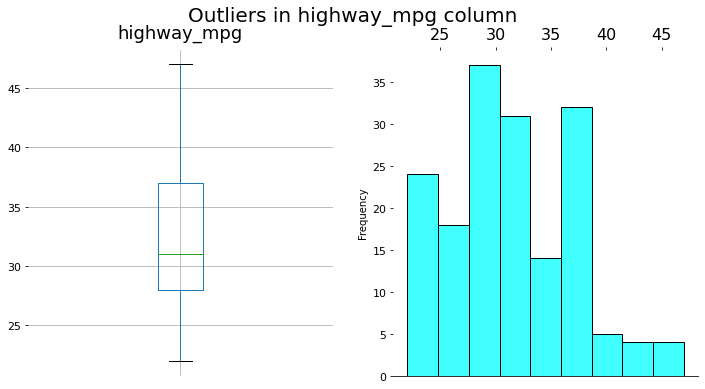

5 Highest values of column:

           make   price  highway_mpg
160      toyota  7738.0           47
159      toyota  7788.0           47
184  volkswagen  7995.0           46
182  volkswagen  7775.0           46
20    chevrolet  6575.0           43
---
Statistical data of column:

count    169.000000
mean      31.538462
std        5.692518
min       22.000000
25%       28.000000
50%       31.000000
75%       37.000000
max       47.000000
Name: highway_mpg, dtype: float64


In [27]:
plot_boxplot(cars,'highway_mpg','#00FFFD')

Outlier removal from the previous columns have cleared the outliers in *highway_mpg*. 

Since many columns have had the outliers removed, it is best to check the columns that did not previously have any outliers like *length*. We shall be ignoring the *bore* column because its correlation to *price* is the least among other. It is therefore unlikely to be part of the creation of our best models.

---

#### Outliers in *length*  column

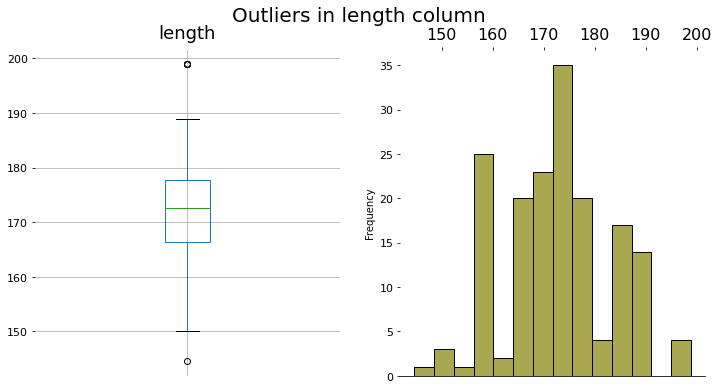

5 Highest values of column:

       make    price  length
114  peugot  17075.0   198.9
109  peugot  12440.0   198.9
113  peugot  16695.0   198.9
110  peugot  13860.0   198.9
14      bmw  24565.0   189.0
---
Statistical data of column:

count    169.000000
mean     172.814793
std       10.780017
min      144.600000
25%      166.300000
50%      172.600000
75%      177.800000
max      198.900000
Name: length, dtype: float64


In [28]:
plot_boxplot(cars,'length','#8D8B15')

Since length has a positive correlation, we shall be removing the outliers in it.

In [29]:
num_lines=len(cars[(cars["length"]<150) | (cars["length"]>190)])
removed_lines+=num_lines
cars=cars[cars["length"].between(149,190)]
bold_print("Number of datapoints removed:")
print(num_lines)

Number of datapoints removed:

5


#### Outliers removal summary

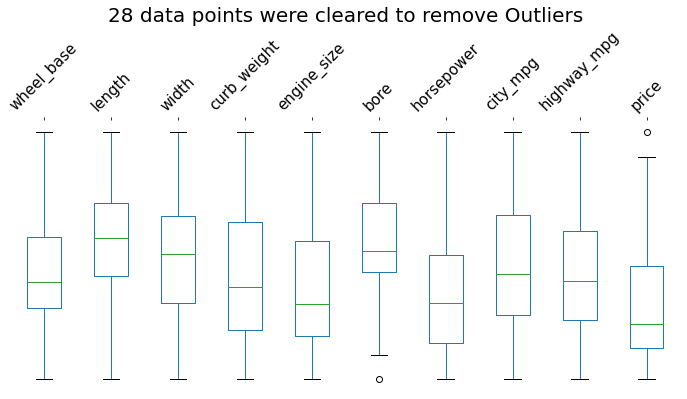

In [30]:
correlated_features=most_corr_features.index
normalized_cols=(cars[correlated_features]-cars[correlated_features].min())/(cars[correlated_features].max()-cars[correlated_features].min())
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for key,vals in ax.spines.items():
    if (key!="top") | (key!="left"):
        ax.spines[key].set_visible(False)
ax.xaxis.tick_top()
normalized_cols.boxplot()
ax.tick_params(axis="x",labelsize=15,labelrotation=45)
ax.tick_params(axis="y",left=False)
ax.set_yticklabels([])
#ax.set_xticks(labelsize=15,labelrotation=45)
plt.title("28 data points were cleared to remove Outliers",size=20)
plt.grid(False)
plt.show()

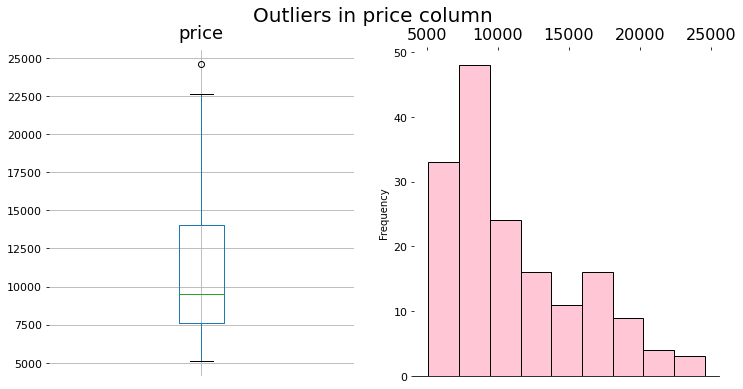

5 Highest values of column:

        make    price
14       bmw  24565.0
204    volvo  22625.0
203    volvo  22470.0
125  porsche  22018.0
202    volvo  21485.0
---
Statistical data of column:

count      164.000000
mean     11052.664634
std       4498.905596
min       5118.000000
25%       7607.500000
50%       9516.500000
75%      14062.250000
max      24565.000000
Name: price, dtype: float64


In [31]:
plot_boxplot(cars,'price','#FFB3C9',['make'])

It looks safe to remove the outlier against *price* as it is a single datapoint. We shall do the same below.

In [32]:
num_lines=len(cars[cars['price']>23000])
removed_lines+=num_lines
cars=cars[cars['price']<23000]

bold_print("Number of datapoints removed:")
print(num_lines)

bold_print("Total Number of data points (inclu. null values) removed:")
removed=removed_lines+14
print(removed)

bold_print("Percentage of data removed:")
percentage=round(removed*100/len(cars_copy),2)
print('{}%'.format(percentage))

Number of datapoints removed:

1
Total Number of data points (inclu. null values) removed:

43
Percentage of data removed:

22.28%


[Index](#Index)

# 7

## On Their Own...
**Models with Univariate features**

Now that we have removed all the outliers from the dataset, we can try and evaluate which of the selected features tend to yield a model with the best predictions. The features with which we shall be generating models are as follows:

- wheel_base
- length
- width
- curb_weight
- engine_size
- bore
- horsepower
- city_mpg
- highway_mpg

While generating the models we shall be using hyperparameter optimization to find out how accuracy varies over different values of **k** i.e. the number of neighbors with which the average price will be calculated. This should help to identify a more accurate model.

In [33]:
#Consolidate column names that are not price
not_price=[each_col for each_col in most_corr_features.index if each_col!='price']

In [34]:
def knn_train_test(feature_col,target_col,data,n=10):
    """
    Calculates the RMSE and accuracy of a univariate model
    
    Args:
        feature_col(string): Name of the column used to create the univariate model
        target_col(string): Name of the column to be analysed
        data(dataframe): Dataset for which analysis will be done
        n(int): Number of neighbors(default is 10)
    
    Returns:
        rmse(float): RMSE value of univariate model
        accuracy(float): Accuracy of univariate model
    """
    feature_train,feature_test,target_train,target_test=skmodelselection.train_test_split(data[[feature_col]],
                                                                                          data[target_col],
                                                                                          test_size=0.2,random_state=1)
    knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(feature_train,target_train)
    predictions = knn.predict(feature_test)
    mse = skmetrics.mean_squared_error(target_test,predictions)
    rmse = mse**0.5
    accuracy = knn.score(feature_test,target_test)
    
    return round(rmse,2), accuracy

In [35]:
parameter=[5,10,15,20]
univariate_param_result=pd.DataFrame(columns=["k"]+not_price)
univariate_accuracy_result=pd.DataFrame(columns=["k"]+not_price)

for each_parameter in parameter:
    parameter_results=[]
    accuracy_results=[]
    parameter_results.append(each_parameter)
    accuracy_results.append(each_parameter)
    
    for each_col in not_price:
        rmse,accuracy=knn_train_test(each_col,"price",cars,each_parameter)
        parameter_results.append(rmse)
        accuracy_results.append(accuracy)
        
    pos=len(univariate_param_result)
    univariate_param_result.loc[pos]=parameter_results
    univariate_accuracy_result.loc[pos]=accuracy_results

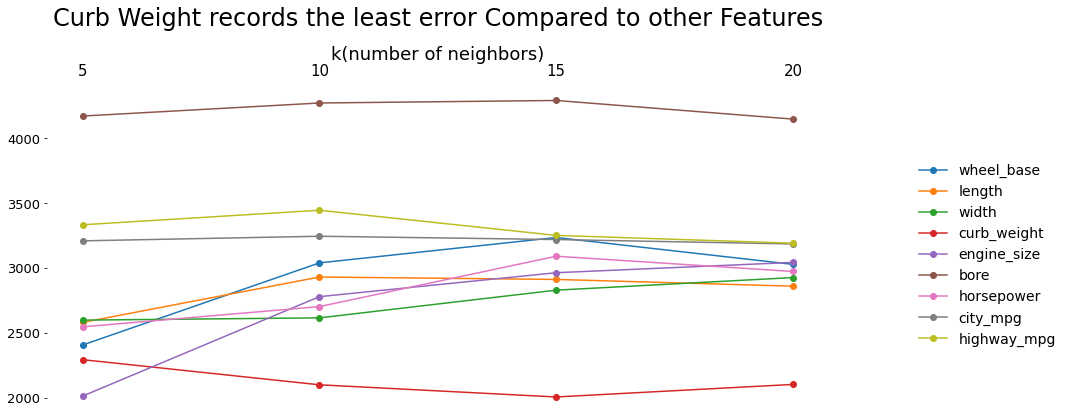

In [36]:
fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(111)
for key,value in ax.spines.items():
    ax.spines[key].set_visible(False)

ax.plot(list(range(5,25,5)),univariate_param_result[not_price],marker='o')
ax.xaxis.tick_top()
ax.tick_params(axis='x',labelsize=15,top=False)
ax.tick_params(axis='y',labelsize=13)
ax.set_xlabel("k(number of neighbors)",size=18)
ax.xaxis.set_label_position('top')
ax.set_xticks([5,10,15,20])
ax.legend(not_price,frameon=False,bbox_to_anchor=(1.1,0.8),fontsize=14)
plt.title("Curb Weight records the least error Compared to other Features",size=24,pad=20)
plt.show()

In [37]:
def highlight_best(val_series):
    """
    Highlight values in a series that follow a specific condition
    
    Args:
        val_series(series): Series to be analyzed
        
    
    Returns:
        Series with values highlighted based on specified condition
    """
    best = val_series.between(70,90)
    return ['background: lightgreen' if cell else '' 
            for cell in best]
idx=pd.IndexSlice
slice1=idx[:,"wheel_base":"highway_mpg"]
univariate_accuracy_result.loc[:,"wheel_base":"highway_mpg"]=univariate_accuracy_result.loc[:,"wheel_base":"highway_mpg"]*100
bold_print("Accuracy(%) of Univariate Models using different k-values")
univariate_accuracy_result.style.apply(highlight_best,subset=slice1).set_precision(2)

Accuracy(%) of Univariate Models using different k-values



As the accuracy table above shows, univariate models associated to *curb_weight* consistently outputs an accuracy greater than 70%. However the features *engine_size* and *wheel_base* give out an accuracy greater than 70% when the number of neighbors is 5.

If we calculate the average RMSE across all the features, we should be able to identify the best features that give the best predictions.

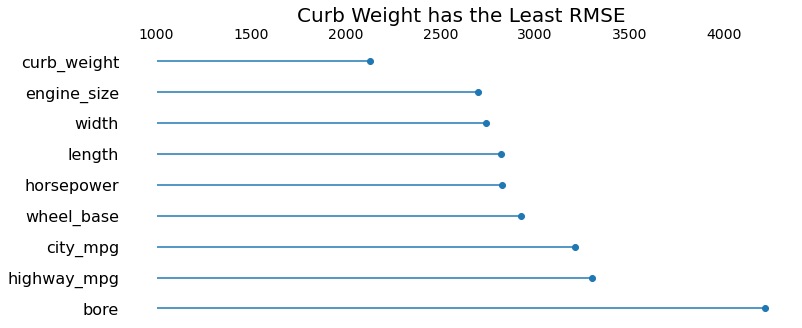

In [38]:
rmse_mean=univariate_param_result.mean(axis=0).sort_values(ascending=False)[:-1]
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)

for key,value in ax.spines.items():
    ax.spines[key].set_visible(False)
ax.hlines(y=rmse_mean.index,xmin=1000,xmax=rmse_mean)
ax.scatter(y=rmse_mean.index,x=rmse_mean)
ax.xaxis.tick_top()
ax.tick_params(axis='x',labelsize=14,top=False)
ax.tick_params(axis='y',labelsize=16,left=False)
plt.title("Curb Weight has the Least RMSE", size=20)
plt.show()

Based on the average RMSE values of all features across various k values, *curb_weight* provides the best univariate model with more than 70% accuracy.

[Index](#Index)

# 8

## ..With the Pack..
**Models with Multivariate Features**

Based on the performance of the univariate models seen earlier, we shall choose the features with the four least RMSEs and use those in various combinations to figure out the combinations that generate the models with the least RMSEs. This exercise should help to generate models with higher accuracies because of the combination of various features

The four features which generated models earlier with comparatively less RMSEs are:
- *curb_weight*
- *engine_size*
- *width*
- *length*

In [39]:
from itertools import combinations

bold_print("Different combinations of the Features:")
input = rmse_mean[-4:].index

#Generate different combinations of pre-selected features
output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
output[5:]

Different combinations of the Features:



[['length', 'width'],
 ['length', 'engine_size'],
 ['length', 'curb_weight'],
 ['width', 'engine_size'],
 ['width', 'curb_weight'],
 ['engine_size', 'curb_weight'],
 ['length', 'width', 'engine_size'],
 ['length', 'width', 'curb_weight'],
 ['length', 'engine_size', 'curb_weight'],
 ['width', 'engine_size', 'curb_weight'],
 ['length', 'width', 'engine_size', 'curb_weight']]

In [40]:
def knn_train_test(feature_cols,target_col,data,n=10):
    """
    Calculates the RMSE and accuracy of a multivariate model
    
    Args:
        feature_col(list): List of column names used to create the multivariate model
        target_col(string): Name of the column to be analysed
        data(dataframe): Dataset for which analysis will be done
        n(int): Number of neighbors(default is 10)
    
    Returns:
        rmse(float): RMSE value of univariate model
        accuracy(float): Accuracy of univariate model
    """
    feature_train,feature_test,target_train,target_test=skmodelselection.train_test_split(data[feature_cols],
                                                                                          data[target_col],
                                                                                          test_size=0.2,random_state=1)
    
    knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(feature_train,target_train)
    predictions = knn.predict(feature_test)
    mse = skmetrics.mean_squared_error(target_test,predictions)
    rmse = mse**0.5
    accuracy = knn.score(feature_test,target_test)
    
    return round(rmse,2), accuracy

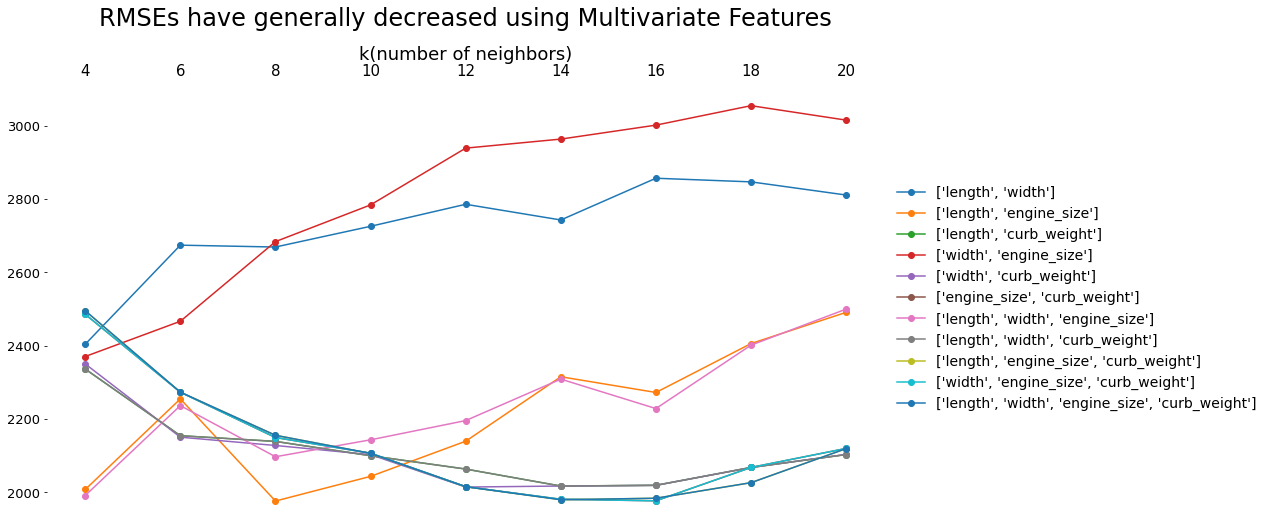

In [41]:
feature_set_rmse=pd.DataFrame(columns=["feature_set","k_4","k_6","k_8",
                                       "k_10","k_12","k_14","k_16",
                                       "k_18","k_20"])
feature_set_accuracy=pd.DataFrame(columns=["feature_set","k_4","k_6","k_8",
                                       "k_10","k_12","k_14","k_16",
                                       "k_18","k_20"])
length=len(feature_set_rmse)
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)
for key,value in ax.spines.items():
    ax.spines[key].set_visible(False)
    
for i in range(5,len(output)):
    rmse_results=[]
    accuracy_results=[]
    rmse_results.append(output[i])
    accuracy_results.append(output[i])
    
    #Select different values for k
    for each_val in range(4,22,2):
        features_rmse,accuracy=knn_train_test(output[i],"price",cars,each_val)
        rmse_results.append(features_rmse)
        accuracy_results.append(accuracy)

    ax.plot(range(4,22,2),rmse_results[1:],marker='o')
    length=len(feature_set_rmse)
    feature_set_rmse.loc[length]=rmse_results
    feature_set_accuracy.loc[length]=accuracy_results

ax.xaxis.tick_top()
ax.tick_params(axis='x',labelsize=15,top=False)
ax.tick_params(axis='y',labelsize=13)
ax.set_xlabel("k(number of neighbors)",size=18)
ax.xaxis.set_label_position('top')
ax.legend(output[5:],frameon=False,bbox_to_anchor=(1,0.8),fontsize=14)

plt.title("RMSEs have generally decreased using Multivariate Features",size=24,pad=20)
plt.show()

In [42]:
def highlight_min(s):
    """
    Highlight values in series based on specific conditions
    
    Args:
        s(series): Series to be analyzed
        
    
    Returns:
        Series with values highlighted based on specified condition
    """
    is_min = s>80
    return ['background: lightgreen' if cell else '' 
            for cell in is_min]
idx=pd.IndexSlice
slice1=idx[:,"k_4":"k_20"]
feature_set_accuracy.loc[:,"k_4":"k_20"] = feature_set_accuracy.loc[:,"k_4":"k_20"]*100
bold_print("Accuracy(%) of Multivariate Models using different k-values")
feature_set_accuracy.style.apply(highlight_min,subset=slice1).set_precision(3)

Accuracy(%) of Multivariate Models using different k-values



The RMSE values have generally decreased and the accuracy has comparably increased after using multiple features. It is also noteable that when the number of neighbors(k) is between 12 and 14, the accuracy of a majority of the models is slightly more than 80%.

Another observations that needs to be considered is that accuracy hits the sweet spot when all the features are used when the number of neighbors is between 12 and 16.

The observations above have been generated by splitting the dataset to training and test sets using an 80:20 ratio respectively. However, we cannot validate the accuracy of the above observations using an external test set. 

Another option that we have is using [cross validation](https://www.geeksforgeeks.org/cross-validation-machine-learning/). We shall attempt the same below.

[Index](#Index)

# 9

## Cross Validate This!

Earlier we identified a few feature sets that created models with slightly more than 80% accuracy. We shall use those feature sets for our cross validation exercise. We shall try to assess how well the different models perform as we increase the number of folds.

In addition to creating multiple folds using the same dataset we shall be observing the accuracy for each fold while changing the k (number of neighbors) value. This assessment should help to pick the optimum number of folds, number of neighbors and best feature sets to create the best model.

Based on the accuracy observations above, we shall use the following feature sets for our combined exercise in cross validation and hyper parameter optimization:

- ['length', 'engine_size']
- ['engine_size', 'curb_weight'] 
- ['length', 'engine_size', 'curb_weight'] 	
- ['width', 'engine_size', 'curb_weight']
- ['length', 'width', 'engine_size', 'curb_weight']

The above feature sets are those that have achieved more thatn 80.5% accuracy with atlease one of the k values.

In [43]:
best_feature_sets = [['length', 'engine_size'],
                     ['engine_size', 'curb_weight'],
                     ['length', 'engine_size', 'curb_weight'],
                     ['width', 'engine_size', 'curb_weight'],
                     ['length', 'width', 'engine_size', 'curb_weight']]

In [44]:
def knn_cross_validation(feature_cols,target_col,data,n=10,folds=4):
    """
    Calculates the RMSE and accuracy of a multivariate model using cross validation
    
    Args:
        feature_col(list): List of column names used to create the multivariate model
        target_col(string): Name of the column to be analysed
        data(dataframe): Dataset for which analysis will be done
        n(int): Number of neighbors(default is 10)
        folds(int): Number of folds or subsets into which the dataset must be divided
    
    Returns:
        rmse(float): RMSE value of univariate model
        accuracy(float): Accuracy of univariate model
    """
    kf=skmodelselection.KFold(n_splits=folds,shuffle=True,random_state=1)
    knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
    scores = skmodelselection.cross_validate(estimator=knn,
                                             X=data[feature_cols],y=data[target_col],
                                             scoring=['neg_root_mean_squared_error','r2'],cv=kf)
    mean_rms=np.abs(np.mean(scores['test_neg_root_mean_squared_error']))
    mean_accuracy=np.mean(scores['test_r2'])
    return mean_rms,mean_accuracy

In [45]:
#Test knn_cross_validation()
scors=knn_cross_validation(['length', 'engine_size'],"price",cars)
scors

(2265.3003665971273, 0.72892499254487)

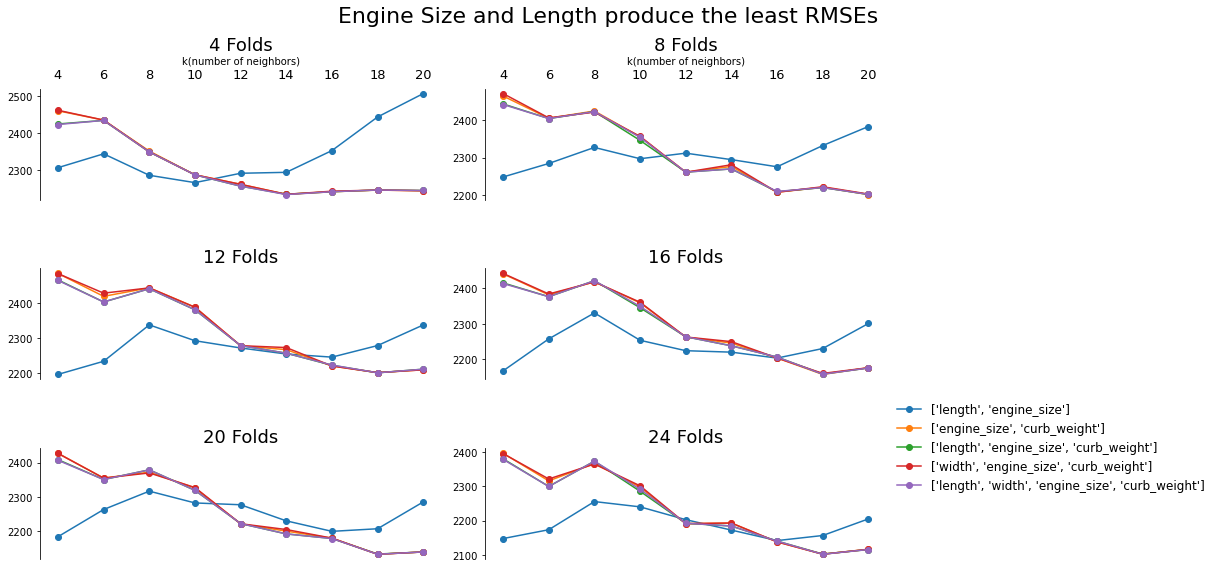

In [46]:
import warnings
warnings.filterwarnings('ignore')

rmse_with_folds = pd.DataFrame(columns=['best_features','fold','num_neighbors',"rmse"])
accuracy_with_folds = pd.DataFrame(columns=['best_features','fold','num_neighbors',"accuracy"])
length=len(rmse_with_folds)
fig=plt.figure(figsize=(17,8))

#Iterate over best feature sets
for i in range(len(best_feature_sets)):
    best_feature=[]
    best_feature.append(best_feature_sets[i])
    
    #Iterate over each fold value
    for each_fold in range(4,28,4):
        plot_val=each_fold/4
        fold=[]
        fold.append(each_fold)
        
        ax=fig.add_subplot(3,2,int(plot_val))
        for key,values in ax.spines.items():
            if key!="left":
                ax.spines[key].set_visible(False)
        ax.tick_params(axis="y",labelsize=10)
        
        #Customize first and second plot
        if (plot_val==1) | (plot_val==2):
            ax.xaxis.tick_top()
            ax.tick_params(axis="x",top=False,labelsize=13)
            ax.set_xticks([4,6,8,10,12,14,16,18,20])
            ax.set_xlabel("k(number of neighbors)",size=10)
            ax.xaxis.set_label_position('top')
        else:
            ax.tick_params(axis="x",bottom=False)
            ax.set_xticklabels([])
        ax.set_title("{} Folds".format(each_fold),size=18)
        
        neighbor_results=[]
        
        #Iterate using different K values for the selected fold
        for each_val in range(4,22,2):
            rmse_results=[]
            accuracy_results=[]
            rmse_results.append(each_val)
            accuracy_results.append(each_val)
            
            features_rmse,features_accuracy=knn_cross_validation(best_feature_sets[i],"price",cars,
                                                                 n=each_val,folds=each_fold)
            neighbor_results.append(features_rmse)
            
            rmse_results.append(features_rmse)
            accuracy_results.append(features_accuracy*100)
            
            result_rmse=best_feature+fold+rmse_results
            result_accuracy=best_feature+fold+accuracy_results
            
            length=len(rmse_with_folds)    
            rmse_with_folds.loc[length]=result_rmse
            accuracy_with_folds.loc[length]=result_accuracy

        ax.plot(range(4,22,2),neighbor_results,marker='o')

plt.legend(best_feature_sets,frameon=False,bbox_to_anchor=(1,1.5),fontsize=12)
plt.suptitle("Engine Size and Length produce the least RMSEs",size=22)
plt.tight_layout()
plt.show()

In [47]:
accuracy_with_folds['best_features']=accuracy_with_folds['best_features'].apply(tuple)
filtered = accuracy_with_folds[accuracy_with_folds["accuracy"]>70].sort_values("accuracy",ascending=False).head(10)
bold_print("Top 10 Multivariate Models based on accuracy using different k-values and Folds")
filtered

Top 10 Multivariate Models based on accuracy using different k-values and Folds



best_features fold num_neighbors   accuracy
71                  (engine_size, curb_weight)    8            20  73.360746
125         (length, engine_size, curb_weight)    8            20  73.347703
233  (length, width, engine_size, curb_weight)    8            20  73.347703
179          (width, engine_size, curb_weight)    8            20  73.323176
221  (length, width, engine_size, curb_weight)    4            14  73.298215
167          (width, engine_size, curb_weight)    4            14  73.284090
59                  (engine_size, curb_weight)    4            14  73.284090
113         (length, engine_size, curb_weight)    4            14  73.276219
62                  (engine_size, curb_weight)    4            20  73.193474
170          (width, engine_size, curb_weight)    4            20  73.193474

The model with the best accuracy which is slightly above 73% consists of features *engine_size* and *curb_weight* which also happens to be the features that are most correlated to *price*. This level of accuracy was obtained while the dataset was divided to 8 subsets or folds and the number of neighbors was 20.

This result is the outcome of removing many outliers. Therefore this level of accuracy may not hold when used against a new set of datapoints.

It also must be noted that because I do not have any experience in the assessment of cars I can only provide a subjective opinion that the level of accuracy is good considering that the value is above 70%. The opinion of experts may certainly differ

[Index](#Index)

# 10

## Conclusion

Coming up with a price for a car is a difficult task considering the number of parameters that can affect the price of the car like its engine size, curb weight, length etc.

Taking the above in to consideration, it would be beneficial to have a system that can predict the price of car taking in to consideration some of the above mentioned parameters. In this project we attempted to create a model that considered these features and use them in conjunction with the K Nearest Neighbors algorithm.

We began by cleaning the dataset and removing the outliers. Once we removed the outliers we first created univariate models using features that are most correlated to *price*. After assessing the best univariate models we chose those features that gave the best RMSEs.

After creating various combinations of the best features, we used those combination of features to generate multivariate models. The combinations that resulted in the best models were used to undergo cross validations with various folds and generate more models. The accuracy of those models and it was found that the model that used the features *engine_size* and *curb_weight* while cross validating with 8 folds gave the most accruacy at approximately 73.36%.

Whether this rate of accuracy is good or bad depends on the opinion of experts.

[Index](#Index)

# 11

## Learnings

- [Normalization or Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)
- [Difference between OnehotEncoder and get_dummies()](https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki)
- [Appending a list or series to a newly created dataframe on the go](https://www.kite.com/python/answers/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python)
- [Creating different combinations of list of elements](https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements)
- [Explanation of sum of empty list](https://stackoverflow.com/questions/19453451/sum-of-nested-list-with-empty-list-explanation)
- [Understanding of Index Slice](https://stackoverflow.com/questions/44087637/pandas-how-does-indexslice-work/53069792)
- [Formating DataFrame slice using Index Slice](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Finer-Control-with-Slicing)
- [Styling for dataframes](https://www.geeksforgeeks.org/highlight-the-maximum-value-in-each-column-in-pandas/)
- [MultiIndexing in Pandas](https://stackoverflow.com/questions/25837440/pandas-boolean-indexing-with-multi-index)
- [More on multi-index](https://riptutorial.com/pandas/topic/3840/multiindex)
- [Accessing data in multiIndex](https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d)
- [Removing Outliers](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)
- Ignore warnings 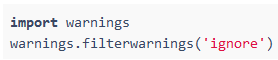
-[Increase distance between title and plot](https://stackoverflow.com/questions/16419670/increase-distance-between-title-and-plot-in-matplolib)
- [Display dataframes side-by-side](https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side)

[Index](#Index)